In [3]:
import funzioni01 as f1
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.ibmq.job import job_monitor
#from qiskit.providers.ibmq import least_busy
from copy import deepcopy
from qiskit.opflow import Zero, One, I, X, Y, Z
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity
from qiskit.circuit import Parameter
import qiskit.ignis.mitigation.measurement as mc
#from qiskit.result import marginal_counts
from sympy import *
from sympy.physics.quantum import TensorProduct as Tp
import numpy as np
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
'''
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')

sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))
backend_sim_jakarta = sim_noisy_jakarta 
backend = provider.get_backend('ibmq_jakarta')
backend_sim = Aer.get_backend('qasm_simulator')
'''

"\nIBMQ.load_account()\nprovider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')\n\nsim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))\nbackend_sim_jakarta = sim_noisy_jakarta \nbackend = provider.get_backend('ibmq_jakarta')\nbackend_sim = Aer.get_backend('qasm_simulator')\n"

In [4]:
e=Symbol("e", positive=True)

r_1 = Symbol("r1")#, positive = True)
phi_1 = Symbol("f1")#, positive = True)
a_1 = Symbol("a1")#, positive = True)
c_1 = Symbol("c1")#, positive = True)

r_2 = Symbol("r2")#, positive = True)
phi_2 = Symbol("f2")#, positive = True)
a_2 = Symbol("a2")#, positive = True)
c_2 = Symbol("c2")#, positive = True)

Id=eye(2)

cx_01= Matrix([
[1,0,0,0],
[0,0,0,1],
[0,0,1,0],
[0,1,0,0]
])
cx_10= Matrix([
[1,0,0,0],
[0,1,0,0],
[0,0,0,1],
[0,0,1,0]
])
m_1 = Matrix([
[1,0,0,0],
[0,1,0,0],
[0,0,e**(1j*a_1)*cos(r_1),e**(1j*phi_1)*sin(r_1)],
[0,0,-e**(-1j*phi_1)*sin(r_1),e**(-1j*a_1)*cos(r_1)]
])

m_2 = Matrix([
[1,0,0,0],
[0,1,0,0],
[0,0,e**(1j*a_2)*cos(r_2),e**(1j*phi_2)*sin(r_2)],
[0,0,-e**(-1j*phi_2)*sin(r_2),e**(-1j*a_2)*cos(r_2)]
])

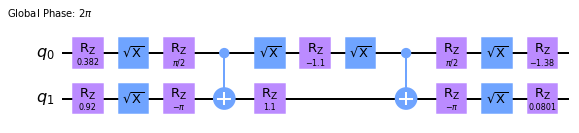

In [13]:
precision=20
tempo=np.pi
steps=47

### calcolo la matrice di evoluzione

U=f1.Trotter_N_approx(steps=steps, tempo=tempo, precision=precision)

### considero la colonna relativa allo stato iniziale desiderato
### in questo caso |110>

b=im(U[5*8+6])
alp1=re(U[3*8+6])
alp2=re(U[5*8+6])
alp3=re(U[6*8+6])

### calcolo i coefficienti per i gate a 2 qubit

r1=acos(sqrt(alp3**2+b**2))
a1=atan(b/alp3)
a2=1
phi1=np.pi+a2-atan(b/alp2)
r2=-acos(sqrt(alp2**2+b**2)/sin(r1))
phi2=-phi1-atan(-2*b/alp1)

gate_1=cx_01*m_1*cx_01
gate_1=gate_1.subs(r_1,r1)
gate_1=gate_1.subs(a_1,a1)
gate_1=gate_1.subs(phi_1,phi1)
gate_1=gate_1.subs(e,np.e)

gate_1=gate_1.evalf(precision)

qc_aus=QuantumCircuit(2)
qc_aus.unitary(gate_1, [0,1])

gate_1=transpile(qc_aus,basis_gates=["cx","rz","ry"])
#gate_1.draw(output="mpl")

gate_2=cx_01*m_2*cx_01
gate_2=gate_2.subs(r_2,r2)
gate_2=gate_2.subs(a_2,a2)
gate_2=gate_2.subs(phi_2,phi2)
gate_2=gate_2.subs(e,np.e)

gate_2=gate_2.evalf(precision)

qc_aus=QuantumCircuit(2)
qc_aus.unitary(gate_2, [0,1])

gate_2=transpile(qc_aus,basis_gates=["cx","rz","x","sx"])
gate_2.draw(output="mpl")

In [9]:
qr=QuantumRegister(7)
qc=QuantumCircuit(qr,name="U")

qc.x([qr[3],qr[5]])

qc.append(gate_1,[qr[1],qr[3]])
qc.append(gate_2,[qr[3],qr[5]])

In [7]:
check=[0]


In [8]:
print(check[0])

0
